# VOICE PREDICT UNTUK DATASET BUKA DAN TUTUP

# Pengambilan Dataset Suara
## Tahap Instalasi
Perintah !wget https://github.com/karoldvl/ESC-50/archive/master.zip digunakan untuk mengunduh (download) file arsip master.zip dari repositori GitHub ESC-50, yaitu dataset berisi 2000 rekaman suara lingkungan dari 50 kelas berbeda (seperti suara pintu, hewan, kendaraan, dll). Setelah file berhasil diunduh, perintah !unzip master.zip digunakan untuk mengekstrak isi file ZIP tersebut ke dalam direktori kerja saat ini, sehingga seluruh struktur folder dan file audio dataset dapat diakses dan digunakan untuk proses analisis atau pelatihan model, misalnya dalam tugas identifikasi suara buka dan tutup.

In [1]:
!wget https://github.com/karoldvl/ESC-50/archive/master.zip
!unzip master.zip

--2025-10-30 09:42:30--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2025-10-30 09:42:30--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2025-10-30 09:42:30--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [   

## Tahap split data buka dan tutup
Kode di atas berfungsi untuk menyiapkan subset dataset suara dari kumpulan data ESC-50, yang merupakan dataset populer berisi berbagai rekaman suara lingkungan. Pertama, kode menentukan path dasar dataset (base_path) beserta lokasi file metadata (meta_path) dan folder audio (audio_path). Kemudian, dibuat dua folder baru bernama dataset/buka dan dataset/tutup menggunakan os.makedirs(), yang akan digunakan untuk menyimpan file suara hasil seleksi. Metadata ESC-50 dibaca menggunakan pandas.read_csv() dari file esc50.csv, yang berisi informasi setiap file seperti nama file, kategori suara, dan label lainnya.

Selanjutnya, kode mendefinisikan dua daftar label penting: open_labels untuk kategori suara buka (door_open, drawer_open) dan close_labels untuk kategori suara tutup (door_close, drawer_close). Melalui perulangan for, setiap baris metadata diperiksa untuk mencocokkan kategori suara dengan salah satu dari dua label tersebut. Jika cocok, file suara yang bersesuaian disalin dari folder asli (audio_path) ke folder target (dataset/buka atau dataset/tutup) menggunakan shutil.copy(). Dengan demikian, hasil akhirnya adalah dua folder yang berisi suara-suara “buka” dan “tutup” yang siap digunakan untuk analisis lebih lanjut atau pelatihan model pengenalan suara.

In [2]:
import os
import shutil
import pandas as pd

# Path dataset ESC-50
base_path = "ESC-50-master"
meta_path = os.path.join(base_path, "meta", "esc50.csv")
audio_path = os.path.join(base_path, "audio")

# Buat folder dataset baru
os.makedirs("dataset/buka", exist_ok=True)
os.makedirs("dataset/tutup", exist_ok=True)

# Baca metadata ESC-50
meta = pd.read_csv(meta_path)

# Daftar label relevan
open_labels = ['door_open', 'drawer_open']
close_labels = ['door_close', 'drawer_close']

# Salin file ke folder baru
for _, row in meta.iterrows():
    filename, category = row['filename'], row['category']
    src = os.path.join(audio_path, filename)

    if category in open_labels:
        shutil.copy(src, f"dataset/buka/{filename}")
    elif category in close_labels:
        shutil.copy(src, f"dataset/tutup/{filename}")

print("✅ Dataset 'buka' dan 'tutup' siap di folder ./dataset/")


✅ Dataset 'buka' dan 'tutup' siap di folder ./dataset/


In [8]:
import os
import shutil
import pandas as pd

# Path ESC-50
base_path = "ESC-50-master"
meta_path = os.path.join(base_path, "meta", "esc50.csv")
audio_path = os.path.join(base_path, "audio")

# Folder target
os.makedirs("dataset/buka", exist_ok=True)
os.makedirs("dataset/tutup", exist_ok=True)

# Baca metadata
meta = pd.read_csv(meta_path)

# Definisikan label kategori
open_labels = ['door_wood_creaks', 'can_opening']
close_labels = ['door_wood_knock', 'glass_breaking']

count_buka, count_tutup = 0, 0

for _, row in meta.iterrows():
    filename, category = row['filename'], row['category']
    src = os.path.join(audio_path, filename)

    if category in open_labels and os.path.exists(src):
        shutil.copy(src, f"dataset/buka/{filename}")
        count_buka += 1
    elif category in close_labels and os.path.exists(src):
        shutil.copy(src, f"dataset/tutup/{filename}")
        count_tutup += 1

print(f"✅ Dataset berhasil disalin:")
print(f" - {count_buka} file kategori buka")
print(f" - {count_tutup} file kategori tutup")


✅ Dataset berhasil disalin:
 - 80 file kategori buka
 - 80 file kategori tutup


## Tahap ekstraksi dataset ke bentuk csv
Code di bawah digunakan untuk mengekstraksi fitur statistik dari data audio dalam dua kategori, yaitu buka dan tutup, yang tersimpan dalam folder dataset. Proses ini dilakukan menggunakan pustaka librosa, numpy, dan pandas untuk membaca file suara, menghitung fitur numerik, dan menyimpan hasilnya dalam bentuk tabel. Program pertama-tama menentukan direktori dataset dan mendefinisikan dua label kelas (buka dan tutup). Kemudian dibuat fungsi extract_features() yang bertugas membaca setiap file audio, menghitung berbagai fitur penting seperti Zero Crossing Rate (ZCR), Root Mean Square Energy (RMSE), Spectral Centroid, Spectral Bandwidth, Spectral Rolloff, serta Mel-Frequency Cepstral Coefficients (MFCC) — fitur-fitur yang sering digunakan dalam analisis sinyal suara karena mampu merepresentasikan karakteristik frekuensi dan energi dari sebuah audio.

Setiap fitur yang dihasilkan kemudian dihitung nilai statistiknya berupa mean (rata-rata) dan standard deviation (simpangan baku) untuk menangkap variasi sinyal dalam domain waktu. Nilai-nilai ini kemudian disusun dalam bentuk dictionary dan dikumpulkan untuk setiap file audio. Setelah seluruh file diproses menggunakan perulangan for, data hasil ekstraksi dikonversi menjadi sebuah DataFrame pandas dan disimpan ke file features_buka_tutup.csv. File CSV tersebut berisi representasi numerik dari setiap file audio dan dapat digunakan sebagai dataset input untuk model machine learning guna melakukan klasifikasi suara buka dan tutup secara otomatis.

In [9]:
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

# Folder dataset
DATASET_DIR = "./dataset"
CATEGORIES = ["buka", "tutup"]

# Fungsi ekstraksi fitur statistik time series
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)

        # --- Fitur dasar ---
        zcr = librosa.feature.zero_crossing_rate(y)[0]
        rmse = librosa.feature.rms(y=y)[0]
        centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # --- Statistik (mean, std, skewness, kurtosis) ---
        features = {
            'zcr_mean': np.mean(zcr),
            'zcr_std': np.std(zcr),
            'rmse_mean': np.mean(rmse),
            'rmse_std': np.std(rmse),
            'centroid_mean': np.mean(centroid),
            'centroid_std': np.std(centroid),
            'bandwidth_mean': np.mean(bandwidth),
            'bandwidth_std': np.std(bandwidth),
            'rolloff_mean': np.mean(rolloff),
            'rolloff_std': np.std(rolloff),
        }

        # Tambahkan statistik MFCC
        for i in range(1, 14):
            features[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
            features[f'mfcc{i}_std'] = np.std(mfcc[i-1])

        return features
    except Exception as e:
        print(f"⚠️ Error processing {file_path}: {e}")
        return None

# --- Proses semua file dan simpan ke DataFrame ---
data = []
for label in CATEGORIES:
    folder = os.path.join(DATASET_DIR, label)
    for file_name in tqdm(os.listdir(folder), desc=f"Processing {label}"):
        if file_name.endswith(".wav"):
            path = os.path.join(folder, file_name)
            features = extract_features(path)
            if features:
                features["file_name"] = file_name
                features["class"] = label
                data.append(features)

# Simpan ke CSV
df = pd.DataFrame(data)
output_path = os.path.join(DATASET_DIR, "features_buka_tutup.csv")
df.to_csv(output_path, index=False)
print(f"\n✅ File fitur disimpan di: {output_path}")
print(f"Jumlah data: {len(df)}")
df.head()


Processing tutup: 100%|██████████| 80/80 [00:06<00:00, 11.56it/s]


✅ File fitur disimpan di: ./dataset/features_buka_tutup.csv
Jumlah data: 160


,zcr_mean,zcr_std,rmse_mean,rmse_std,centroid_mean,centroid_std,bandwidth_mean,bandwidth_std,rolloff_mean,rolloff_std,...,mfcc10_mean,mfcc10_std,mfcc11_mean,mfcc11_std,mfcc12_mean,mfcc12_std,mfcc13_mean,mfcc13_std,file_name,class
0,0.070293,0.104844,0.013813,0.042224,3572.188395,2621.653406,3639.640181,2204.524716,7952.596614,5029.138928,...,5.499918,8.546938,0.482929,7.066132,7.734562,8.078377,3.213988,7.520833,1-60676-A-34.wav,buka
1,0.253106,0.124043,0.025498,0.067490,7378.544908,1842.851740,4493.208620,1038.433089,12268.230224,2527.106823,...,12.192638,9.742858,4.407387,10.425277,8.257361,10.083152,-2.394024,9.418756,5-244327-A-34.wav,buka
2,0.043081,0.106302,0.010770,0.043666,1638.673579,3020.991522,1169.876403,2055.813983,3013.799100,5309.768784,...,1.673384,6.038009,-0.601584,5.186756,0.690051,2.828802,-1.171857,5.913638,2-144031-A-34.wav,buka
3,0.053414,0.115738,0.015641,0.048038,2113.033972,3129.237440,1686.644209,2275.539721,4135.873831,5714.030283,...,4.856855,7.684752,0.690305,6.297227,2.398970,5.285916,0.180596,5.465430,4-212728-A-34.wav,buka
4,0.117995,0.119319,0.015058,0.020823,4456.119459,4273.594197,3489.679911,2441.323740,7786.226390,7687.543080,...,-7.705462,10.932606,-6.846434,8.488650,-2.197596,8.852383,0.870636,5.406569,3-101381-B-33.wav,buka


# Pra-pemrosesan Fitur Suara
Code di bawah digunakan untuk mengonversi sinyal suara mentah menjadi fitur numerik siap prediksi dalam sistem identifikasi suara buka dan tutup. Fungsi predict_sound(file_path) dimulai dengan membaca file audio menggunakan librosa.load(), yang menghasilkan sinyal suara (y) dan sampling rate (sr). Kemudian dilakukan ekstraksi berbagai fitur penting seperti Zero Crossing Rate (ZCR), Root Mean Square Energy (RMSE), Spectral Centroid, Spectral Bandwidth, Spectral Rolloff, dan Mel-Frequency Cepstral Coefficients (MFCC) sebanyak 13 koefisien. Setiap fitur dihitung nilai rata-rata (mean) dan standar deviasi (std) untuk mendapatkan representasi statistik dari keseluruhan durasi audio. Hasil perhitungan disusun ke dalam dictionary features sebagai kumpulan nilai-nilai fitur mentah.

Setelah semua fitur dihitung, dictionary tersebut dikirim ke fungsi preprocess_features() yang berada di file utils/preprocess.py. Fungsi ini bertanggung jawab untuk melakukan standarisasi atau normalisasi agar skala setiap fitur konsisten dengan data yang digunakan saat pelatihan model. Hasil akhir (processed_features) berupa vektor numerik yang sudah siap dimasukkan ke model machine learning (misalnya Random Forest) untuk melakukan prediksi apakah suara yang dianalisis termasuk kategori “buka” atau “tutup”. Dengan struktur modular seperti ini, sistem menjadi lebih terorganisir — bagian ekstraksi fitur, pra-pemrosesan, dan prediksi dapat dikembangkan atau diuji secara terpisah tanpa saling mengganggu.

In [ ]:
import pandas as pd
import numpy as np
import joblib
import os

# Path scaler (jika digunakan)
SCALER_PATH = "models/scaler.pkl"

def preprocess_features(feature_dict):
    """
    Melakukan preprocessing fitur sebelum prediksi.
    - Pastikan urutan kolom sama dengan saat training.
    - Terapkan scaler jika ada (opsional).
    """
    # Ubah dict menjadi DataFrame
    df = pd.DataFrame([feature_dict])

    # Urutan kolom fitur sesuai training
    expected_cols = [
        'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std',
        'centroid_mean', 'centroid_std', 'bandwidth_mean', 'bandwidth_std',
        'rolloff_mean', 'rolloff_std'
    ]

    # Tambahkan MFCC
    for i in range(1, 14):
        expected_cols.append(f'mfcc{i}_mean')
        expected_cols.append(f'mfcc{i}_std')

    # Pastikan semua kolom ada
    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0.0

    # Urutkan kolom sesuai urutan yang diharapkan
    df = df[expected_cols]

    # Terapkan scaler jika tersedia
    if os.path.exists(SCALER_PATH):
        scaler = joblib.load(SCALER_PATH)
        df_scaled = scaler.transform(df)
        return df_scaled[0]
    else:
        return df.values[0]


# Pelatihan data
Code di bawah digunakan untuk melatih model machine learning yang mampu membedakan suara “buka” dan “tutup” berdasarkan fitur-fitur statistik yang telah diekstraksi sebelumnya dari data audio. Pertama, program membaca dataset features_buka_tutup.csv menggunakan pandas, kemudian memisahkan kolom fitur (X) dari kolom target (y), di mana y berisi label kelas suara (“buka” atau “tutup”). Dataset kemudian dibagi menjadi dua bagian menggunakan fungsi train_test_split: data latih (80%) dan data uji (20%), agar model dapat diuji pada data yang belum pernah dilihat sebelumnya dan menghindari overfitting.

Selanjutnya, model Random Forest Classifier dari pustaka scikit-learn digunakan untuk melakukan proses pelatihan. Random Forest merupakan algoritma berbasis ensemble learning yang menggabungkan banyak pohon keputusan untuk menghasilkan prediksi yang lebih akurat dan stabil. Setelah model dilatih pada data latih (model.fit), akurasinya diuji menggunakan data uji dengan fungsi model.score(). Hasil akurasi menunjukkan seberapa baik model mampu mengenali pola suara buka dan tutup. Akhirnya, model yang telah dilatih disimpan dalam bentuk file classifier.pkl menggunakan pustaka joblib, sehingga dapat digunakan kembali pada tahap deployment atau saat menjalankan aplikasi prediksi suara berbasis Streamlit tanpa perlu melatih ulang model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load data
df = pd.read_csv("data/features_buka_tutup.csv")

X = df.drop(columns=["file_name", "class"])
y = df["class"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Akurasi:", model.score(X_test, y_test))

# Simpan model
joblib.dump(model, "models/classifier.pkl")
print("Model disimpan ke models/classifier.pkl (berhasil disimpan)")


# Utilitas untuk Prediksi Suara
Code di bawah digunakan untuk mengonversi sinyal suara mentah menjadi fitur numerik siap prediksi dalam sistem identifikasi suara buka dan tutup. Fungsi predict_sound(file_path) dimulai dengan membaca file audio menggunakan librosa.load(), yang menghasilkan sinyal suara (y) dan sampling rate (sr). Kemudian dilakukan ekstraksi berbagai fitur penting seperti Zero Crossing Rate (ZCR), Root Mean Square Energy (RMSE), Spectral Centroid, Spectral Bandwidth, Spectral Rolloff, dan Mel-Frequency Cepstral Coefficients (MFCC) sebanyak 13 koefisien. Setiap fitur dihitung nilai rata-rata (mean) dan standar deviasi (std) untuk mendapatkan representasi statistik dari keseluruhan durasi audio. Hasil perhitungan disusun ke dalam dictionary features sebagai kumpulan nilai-nilai fitur mentah.

Setelah semua fitur dihitung, dictionary tersebut dikirim ke fungsi preprocess_features() yang berada di file utils/preprocess.py. Fungsi ini bertanggung jawab untuk melakukan standarisasi atau normalisasi agar skala setiap fitur konsisten dengan data yang digunakan saat pelatihan model. Hasil akhir (processed_features) berupa vektor numerik yang sudah siap dimasukkan ke model machine learning (misalnya Random Forest) untuk melakukan prediksi apakah suara yang dianalisis termasuk kategori “buka” atau “tutup”. Dengan struktur modular seperti ini, sistem menjadi lebih terorganisir — bagian ekstraksi fitur, pra-pemrosesan, dan prediksi dapat dikembangkan atau diuji secara terpisah tanpa saling mengganggu.

In [ ]:
import numpy as np
import librosa
from utils.preprocess import preprocess_features

def predict_sound(file_path):
    y, sr = librosa.load(file_path, sr=None)

    zcr = librosa.feature.zero_crossing_rate(y)[0]
    rmse = librosa.feature.rms(y=y)[0]
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Buat dict fitur mentah
    features = {
        'zcr_mean': np.mean(zcr),
        'zcr_std': np.std(zcr),
        'rmse_mean': np.mean(rmse),
        'rmse_std': np.std(rmse),
        'centroid_mean': np.mean(centroid),
        'centroid_std': np.std(centroid),
        'bandwidth_mean': np.mean(bandwidth),
        'bandwidth_std': np.std(bandwidth),
        'rolloff_mean': np.mean(rolloff),
        'rolloff_std': np.std(rolloff)
    }

    for i in range(1, 14):
        features[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
        features[f'mfcc{i}_std'] = np.std(mfcc[i-1])

    # Preprocessing sebelum prediksi
    processed_features = preprocess_features(features)
    return processed_features


# Deploy Aplikasi Identifikasi Suara Buka dan Tutup
Code di bawah merupakan implementasi antarmuka pengguna berbasis Streamlit untuk mendeteksi apakah suara yang diunggah termasuk kategori buka atau tutup menggunakan model machine learning yang telah dilatih sebelumnya. Aplikasi ini dimulai dengan memuat pustaka yang diperlukan dan mengatur konfigurasi tampilan halaman Streamlit. Model yang sudah disimpan sebelumnya dalam file models/classifier.pkl dimuat menggunakan joblib.load() agar siap digunakan untuk melakukan prediksi. Pengguna kemudian dapat mengunggah file audio berformat .wav melalui komponen st.file_uploader(). Setelah file diunggah, audio ditampilkan di halaman agar pengguna bisa mendengarkannya sebelum diproses lebih lanjut.

Selanjutnya, aplikasi menjalankan proses ekstraksi fitur statistik time series melalui fungsi predict_sound() yang akan menghitung berbagai parameter seperti ZCR, RMSE, centroid, bandwidth, rolloff, dan MFCC. Setelah fitur berhasil diekstraksi, sistem memprosesnya dan memberikan hasil prediksi apakah suara tersebut tergolong buka atau tutup. Hasil prediksi ditampilkan menggunakan elemen st.success() dengan format yang menarik dan mudah dibaca. Selain itu, aplikasi juga menampilkan tabel berisi nilai-nilai fitur statistik yang digunakan untuk prediksi agar pengguna dapat melihat bagaimana karakteristik suara direpresentasikan secara numerik. Dengan demikian, aplikasi ini menjadi sistem identifikasi suara interaktif yang sederhana namun efektif untuk diterapkan dalam analisis akustik berbasis machine learning.

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import librosa
import os
from utils.predict import predict_sound

st.set_page_config(page_title="Identifikasi Suara Buka/Tutup", layout="wide")

st.title("🔊 Identifikasi Suara Buka/Tutup")
st.markdown("Gunakan model berbasis **fitur statistik time series** untuk mendeteksi apakah suara termasuk kategori **buka** atau **tutup**.")

# Load model
MODEL_PATH = "models/classifier.pkl"
model = joblib.load(MODEL_PATH)

# Upload file audio
uploaded_file = st.file_uploader("🎵 Upload file audio (.wav)", type=["wav"])

if uploaded_file:
    st.audio(uploaded_file)

    # Ekstraksi fitur
    with st.spinner("Ekstraksi fitur sedang dilakukan..."):
        temp_path = f"temp.wav"
        with open(temp_path, "wb") as f:
            f.write(uploaded_file.getbuffer())

        features = predict_sound(temp_path)
        os.remove(temp_path)

    # Prediksi
    pred = model.predict([features])[0]
    st.success(f"🎯 Prediksi: **{pred.upper()}**")

    # Tampilkan fitur
    st.subheader("📊 Fitur Statistik:")
    st.dataframe(pd.DataFrame([features]))


### Capture UI prediksi buka

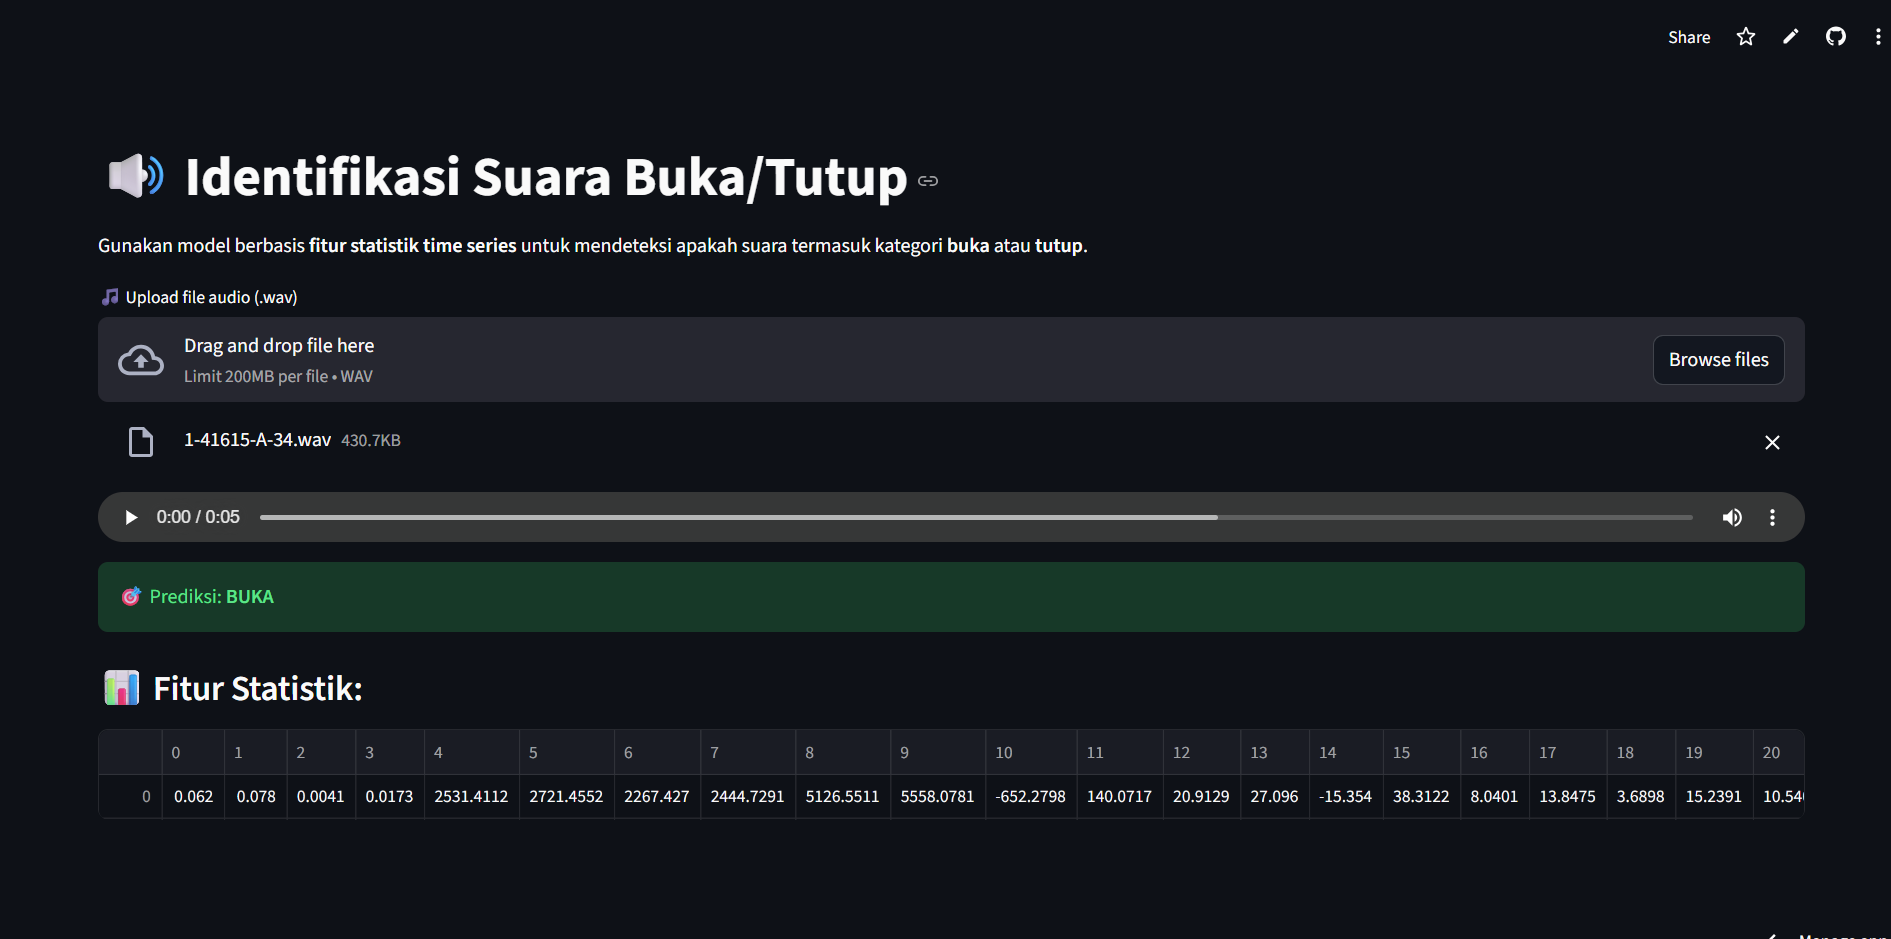

### Capture UI prediksi tutup

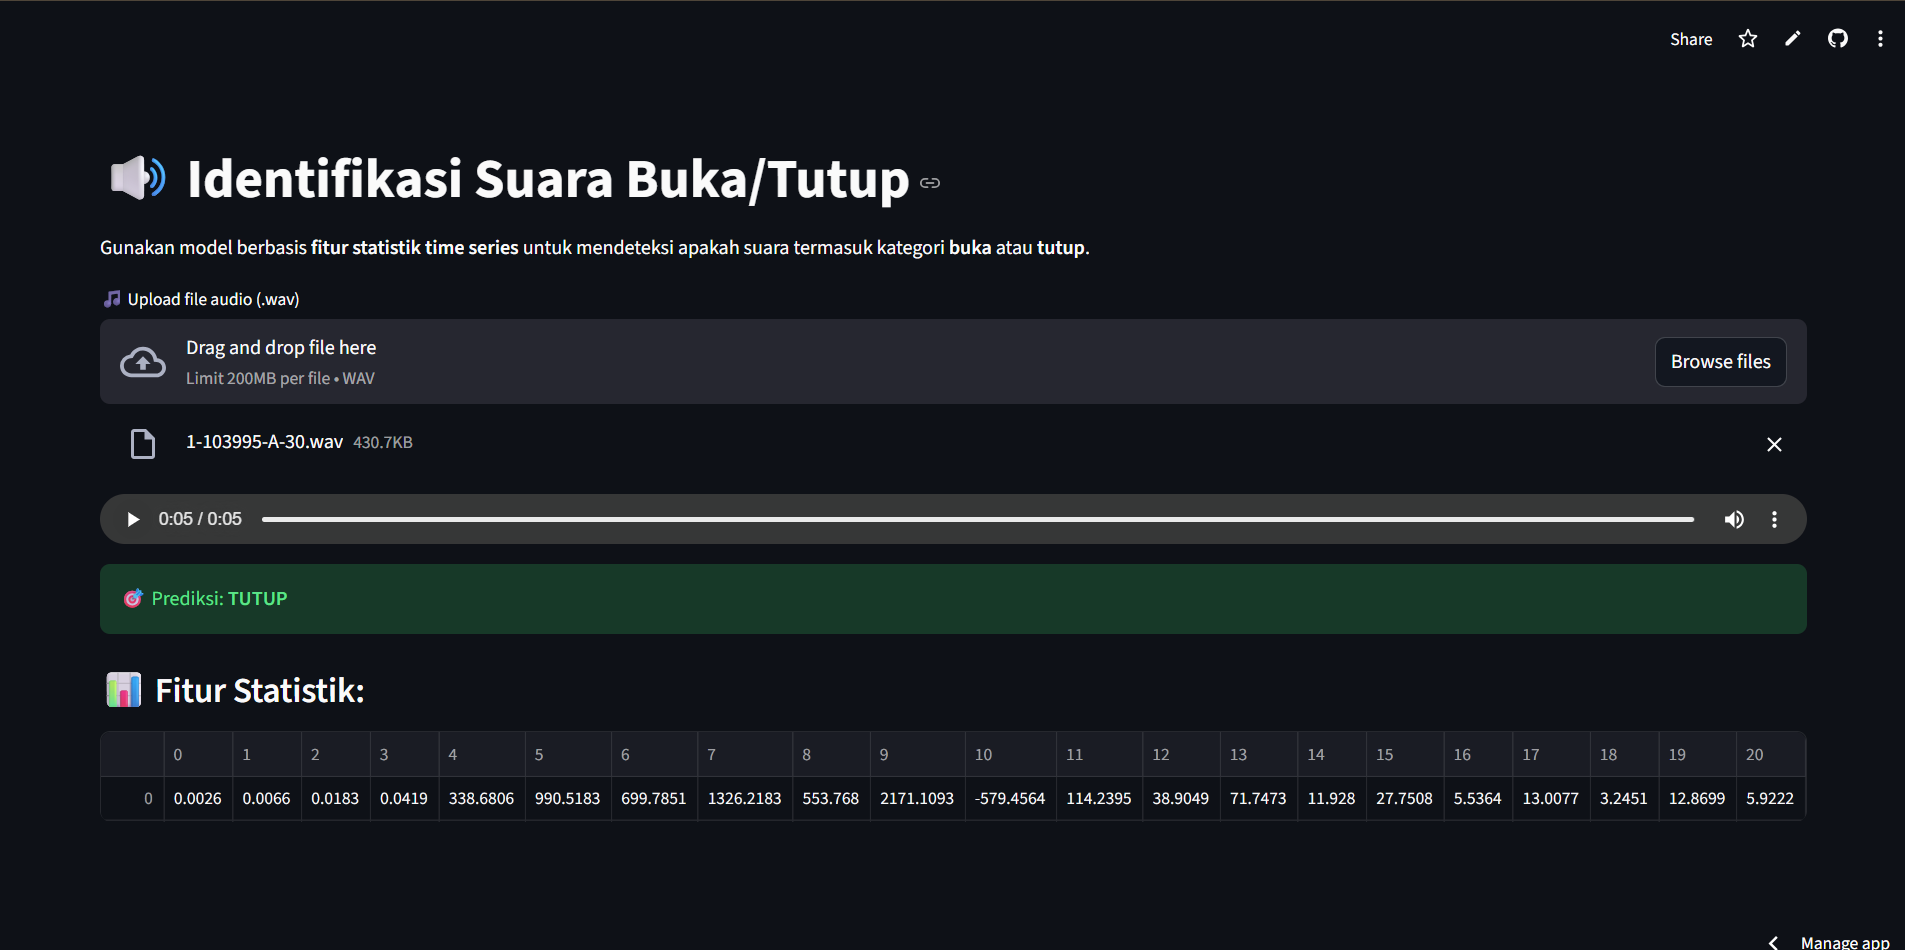

link Deploy voice predict :

https://voicepredictdeploy-abdmalik136.streamlit.app/